In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= sns.load_dataset('iris')

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
data.shape

(150, 5)

In [10]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


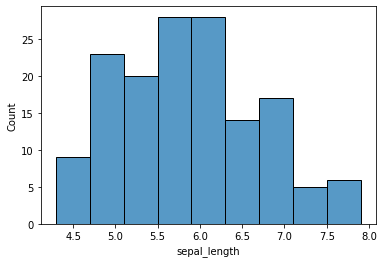

In [17]:
#univariant analysis 
sns.histplot( x = 'sepal_length', data = data)
plt.show()

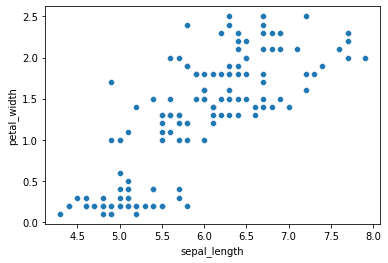

In [19]:
sns.scatterplot( x = 'sepal_length',y = 'petal_width', data = data)
plt.show()

In [22]:
data['species']= data['species'].map({'setosa': 2, 'versicolor' : 1, 'virginica' : 0} )

In [23]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


<AxesSubplot:ylabel='Count'>

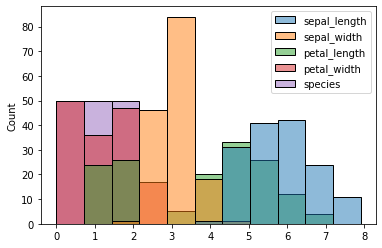

In [24]:
sns.histplot( data = data)

<AxesSubplot:ylabel='count'>

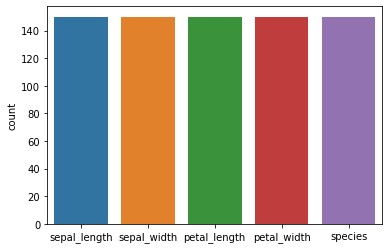

In [26]:
sns.countplot(data = data)

In [40]:
X = data.drop(columns=['species'],axis=1)
y = data.species

In [41]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [43]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [44]:
y_train

22     2
15     2
65     1
11     2
42     2
      ..
71     1
106    0
14     2
92     1
102    0
Name: species, Length: 120, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',C= 1.0)
svm_model.fit(X_train_scaled,y_train)
y_pred = svm_model.predict(X_test_scaled)

In [50]:
y_pred

array([1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2], dtype=int64)

In [55]:
from sklearn.metrics import classification_report,accuracy_score
report =classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [57]:
score = accuracy_score(y_test,y_pred)
print('accuracy_score:\n',score)

accuracy_score:
 0.9666666666666667
